# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [2]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

Às vezes é necessário instalar o openpyxl. Só descomentar:

In [3]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


## Carregamento do grafo

In [4]:
grafo_titulo = load_gt('projeto-one-mode-dicotomizado.net.gz')

In [5]:
from graph_tool import centrality, clustering

# calculo clustering coefficient
c = clustering.local_clustering(grafo_titulo)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_titulo)

# calculo degree
dc = degree_gt(grafo_titulo)

grafo_titulo.vp['betweenness'] = bc
grafo_titulo.vp['clustering'] = c
grafo_titulo.vp['degree'] = dc

In [6]:
df = pd.DataFrame({k: list(v) for k, v in grafo_titulo.vp.items()})

In [7]:
filmes = pd.read_excel('netflix.xlsx')

In [8]:
df.sort_values(by='betweenness')

,id,nome,_x,_y,betweenness,clustering,degree
4570,4570,The Accidental Detective,1462.444475,-296.184349,0.000000,0.000000,0.000000
5880,5880,Suite Francaise,-49.057870,82.788402,0.000000,1.000000,0.000547
5879,5879,Legend,20.440279,180.686767,0.000000,1.000000,0.003282
5878,5878,David Beckham: Into the Unknown,1146.086944,396.684496,0.000000,0.000000,0.000000
5877,5877,Daddys Home,848.418539,-351.984671,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
3344,3344,Doraemon the Movie: Nobita in the Secret Gadge...,71.634063,70.004605,0.002574,0.201068,0.123085
5556,5556,Lupin the 3rd TV Special: Sweet Lost Night,53.699901,105.554355,0.002686,0.200062,0.078775
8262,8262,Black Butler,55.221557,99.514835,0.003994,0.173171,0.105033
5815,5815,Steven Universe,62.987539,66.530887,0.004380,0.159512,0.144639


In [9]:
filmes.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [10]:
# filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})
filmes_score = filmes[['Rotten Tomatoes Score', 'Title']].rename(columns={"Title":"nome"})

In [11]:
filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

Remoção de filmes duplicados

In [12]:
filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

In [13]:
filmes_score = filmes_score.dropna()
filmes_score.head()

,Rotten Tomatoes Score,nome
0,98.0,Lets Fight Ghost
1,79.0,HOW TO BUILD A GIRL
6,20.0,The Invisible
7,92.0,The Simple Minded Murderer
10,52.0,I


Adição da coluna `Rotten Tomatoes Score` ao datafram `df`

In [14]:
df.head(4)

,id,nome,_x,_y,betweenness,clustering,degree
0,0,Lets Fight Ghost,-1.436253,77.806371,0.000003,0.794466,0.002516
1,1,HOW TO BUILD A GIRL,-229.729180,1039.631642,0.000000,0.000000,0.000000
2,2,The Con-Heartist,854.216640,357.749654,0.000000,0.000000,0.000000
3,3,Gleboka woda,-62.084147,-830.782865,0.000000,0.000000,0.000000


In [15]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [16]:
df.nome.describe()

count                 9141
unique                9141
top       Lets Fight Ghost
freq                     1
Name: nome, dtype: object

In [17]:
# aqui tinhamos o desempenho
# df = df.rename(columns={"IMDb Score": 'desempenho'})

# nova métrica: reputação
df = df.rename(columns={"Rotten Tomatoes Score": 'reputacao'})

In [18]:
df = df.dropna() # melhorar isso futuramente

In [19]:
df.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
0,Lets Fight Ghost,0,-1.436253,77.806371,0.000003,0.794466,0.002516,98.0
1,HOW TO BUILD A GIRL,1,-229.729180,1039.631642,0.000000,0.000000,0.000000,79.0
6,The Invisible,6,55.645344,122.529907,0.000031,0.653269,0.024836,20.0
7,The Simple Minded Murderer,7,-1144.111152,-437.080844,0.000000,0.000000,0.000000,92.0


In [20]:
import seaborn as sns
sns.set()

In [21]:
import statsmodels.formula.api as smf

### Agrupamento

In [22]:
# pegamos apenas os betweenness com valores > 0 
df_positivos = df[df['betweenness'] > 0]
df_positivos.head(4)

,nome,id,_x,_y,betweenness,clustering,degree,reputacao
0,Lets Fight Ghost,0,-1.436253,77.806371,0.000003,0.794466,0.002516,98.0
6,The Invisible,6,55.645344,122.529907,0.000031,0.653269,0.024836,20.0
62,Ride Your Wave,62,44.678612,36.371525,0.000211,0.465652,0.044311,93.0
89,The Shadow,89,67.704799,97.362622,0.000023,0.452498,0.021335,35.0


<AxesSubplot:xlabel='betweenness', ylabel='reputacao'>

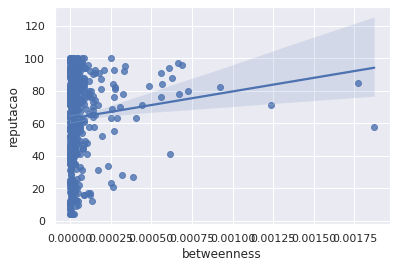

In [23]:
sns.regplot(x=df_positivos['betweenness'], y=(df_positivos['reputacao']))

<AxesSubplot:xlabel='betweenness', ylabel='reputacao'>

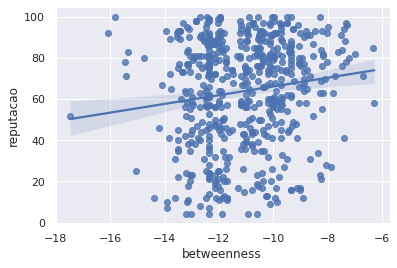

In [24]:
sns.regplot(x=np.log(df_positivos['betweenness']), y=df_positivos['reputacao'])

In [25]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness)')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 22 Nov 2021   Prob (F-statistic):            0.00107
Time:                        13:29:07   Log-Likelihood:                -2657.1
No. Observations:                 570   AIC:                             5318.
Df Residuals:                     568   BIC:                             5327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              87.3210      7.219     12.095      0.000      73.141     101.501
np.log(betweenness)     2.1177      0.644      3.287      0.001       0.852       3.383
==============================================================================
Omnibus:                       53.571   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.192
Skew:                          -0.549   Prob(JB):                     1.87e-09
Kurtosis:                       2.302   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como esperado após a análise dos gráficos, o R² é bem pequeno quando queremos explicar o desempenho levando em conta o __betweenness__. Além disso, podemos ver que o coeficiente é positivo, indicando que existe uma relação positiva, no entanto, o _p\_valor_ é muito grande, ou seja, não podemos rejeitar a hipótese nula de que não há relação.

### Diversidade

<AxesSubplot:xlabel='clustering', ylabel='reputacao'>

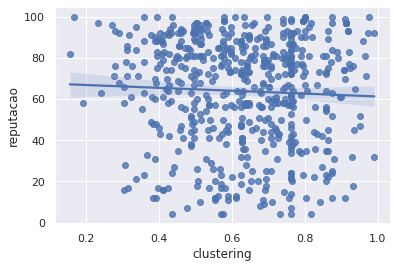

In [26]:
sns.regplot(x=df_positivos['clustering'], y=df_positivos['reputacao']) # % dos vizinhos conectados entre si 

# colocar como variavel de controle -> degree

In [27]:
model = smf.ols(data=df_positivos, formula='reputacao ~ clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.167
Date:                Mon, 22 Nov 2021   Prob (F-statistic):              0.280
Time:                        13:29:08   Log-Likelihood:                -2661.9
No. Observations:                 570   AIC:                             5328.
Df Residuals:                     568   BIC:                             5336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.2560      4.215     16.193      0.000      59.977      76.535
clustering    -6.9868      6.466     -1.080      0.280     -19.688       5.714
==============================================================================
Omnibus:                       56.643   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.135
Skew:                          -0.586   Prob(JB):                     2.61e-10
Kurtosis:                       2.302   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é desprezível quando queremos explicar o __desempenho__ levando em conta o __clustering__. Além disso, podemos ver que o coeficiente é negativo, indicando que existe uma relação negativa, no entanto, o _p\_valor_ é muito grande, ou seja, também não podemos rejeitar a hipótese nula de que não há relação.

Após analisarmos individualmente a contribuição de cada variável, decidimos testar o impacto da combinação das duas no desempenho do filme.

<AxesSubplot:ylabel='reputacao'>

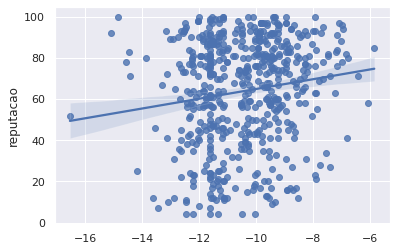

In [28]:
sns.regplot(x=np.log(df_positivos['betweenness'])+df_positivos['clustering'], y=df_positivos['reputacao'])


In [29]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness) + clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.344
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           0.000710
Time:                        13:29:08   Log-Likelihood:                -2655.2
No. Observations:                 570   AIC:                             5316.
Df Residuals:                     567   BIC:                             5329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              90.7825      7.416     12.242      0.000      76.217     105.348
np.log(betweenness)     3.4784      0.947      3.673      0.000       1.619       5.338
clustering             18.4411      9.425      1.957      0.051      -0.071      36.953
==============================================================================
Omnibus:                       56.330   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.462
Skew:                          -0.532   Prob(JB):                     2.70e-09
Kurtosis:                       2.273   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pelo que se pode observar, a contribuição da combinação das variáveis não parece ser suficiente para explicar o desempenho de um filme. A combinação dos coeficientes com seus respectivos _p\_valores_ continua ruim, no entanto, podemos ver uma melhoria ínfima no R².

Portanto, dado que a hipótese era que, de alguma forma, o __agrupamento__ e a __diversidade__ explicavam o __desempenho__, pode-se dizer que a hipótese não se comprova estatisticamente ou que precisaríamos de um refinamento melhor no modelo.

## Iterando com degree

Considerando o impacto do degree sobre a variável clustering

<AxesSubplot:xlabel='degree', ylabel='reputacao'>

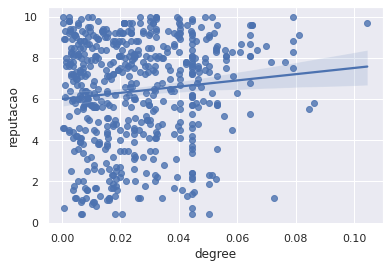

In [30]:
sns.regplot(x=df_positivos['degree'], y=df_positivos['reputacao']/10) # % dos vizinhos conectados entre si 


In [31]:
model = smf.ols(data=df_positivos, formula='reputacao ~ degree')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.470
Date:                Mon, 22 Nov 2021   Prob (F-statistic):             0.0112
Time:                        13:29:08   Log-Likelihood:                -2659.2
No. Observations:                 570   AIC:                             5322.
Df Residuals:                     568   BIC:                             5331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0141      1.855     32.348      0.000      56.370      63.658
degree       151.1512     59.425      2.544      0.011      34.432     267.870
==============================================================================
Omnibus:                       54.986   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.452
Skew:                          -0.571   Prob(JB):                     6.05e-10
Kurtosis:                       2.306   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model = smf.ols(data=df_positivos, formula='reputacao ~ np.log(betweenness) + clustering + degree')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              reputacao   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.538
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           0.000943
Time:                        13:29:09   Log-Likelihood:                -2654.2
No. Observations:                 570   AIC:                             5316.
Df Residuals:                     566   BIC:                             5334.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              84.9040      8.547      9.934      0.000      68.116     101.692
np.log(betweenness)     3.0748      0.990      3.105      0.002       1.130       5.020
clustering             17.1792      9.462      1.816      0.070      -1.405      35.764
degree                 86.6341     62.788      1.380      0.168     -36.692     209.960
==============================================================================
Omnibus:                       53.906   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.666
Skew:                          -0.529   Prob(JB):                     4.02e-09
Kurtosis:                       2.288   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""